In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import factorial
from scipy.stats import linregress
from scipy.special import gammaln
from scipy.stats import poisson
import pytest

## Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day. If we have count data 𝑦 that are influenced by a covariate or feature 𝑥 , we can used the maximum likelihood principle to develop a regression model relating 𝑥 to y.

### Part 1

In [2]:
def poissonNegLogLikelihood(lam, y):
    """
    Computes the negative log-likelihood for a Poisson random variable.

    Inputs:
    lam - float or array.  Parameter for the poisson distribution.
    y - float or array.  Observed data.

    Outputs:
    log_lik - float.  The negative log-likelihood for the data (y) with parameter (lam).

    """
    log_lik = -1 * np.sum(y * np.log(lam) - lam - gammaln(y + 1))
    return log_lik

### Part 2

In [3]:
def poisson_mle(data):
    """
    Compute the maximum likelihood estimate (mle) for a poisson distribution given data.

    Inputs:
    data - float or array.  Observed data.

    Outputs:
    lambda_mle - float.  The mle for poisson distribution.
    """
    mle = minimize(poissonNegLogLikelihood, 1, args=(data))
    lambda_mle = mle.x[0]
    return lambda_mle

### Part 3

In [4]:
def poissonRegressionNegLogLikelihood(b, X, y):
    """
    Computes the negative log-likelihood for a poisson regression.

    Inputs:
    b - array.  Coefficients for the poisson regression
    X - array.  Design matrix.
    y - array.  Observed outcomes.

    Outputs:
    log_lik - float.  Negative log likelihood for the poisson regression with coefficients b.

    """
    n, p = X.shape
    eta = X @ b
    lam = np.exp(eta)
    log_lik = poissonNegLogLikelihood(lam, y)
    
    return log_lik

### Part 4

Identity link (λ =X * β) is usually used for Linear-response data and with normal distrubution which has infinite support, which means values modelled by the normal can take any negative or positive number. Although our data (number of snowflakes) are count data, if the counts are large the may well look pretty normal. But Counts are integers, whereas the normal distribution is for continuous data that can include any fraction. Counts also can’t be less than zero, but the Normal distribution model’s stochastic processes that draw zeros and negative numbers.
 
Here we are using poisson distribution which is used to describe the number of snowflakes in this observation. Poisson distribution is specified by its only parameter which is lambda. Lambda equals the mean and variance. Using the log link assures that the modeled means on the count scale are strictly positive.
 
If x ∈ Rn is a vector of independent variables, then the model would take the form of log(E(Y|x)) = Θx. As said above, lambda (λ) is a mean devided by the dimension of our observation space and it is equal to (E(Y|x)). E(y|x) = exp(Θx) => λ = exp(Θx)
 
If we just passed λ = Θx, it could be sometimes problematic, because λ must be >0 but  Θx may not.

### Part 5

In [5]:
def fitPoissonRegression(X, y):
    """
    Fits a poisson regression given data and outcomes.

    Inputs:
    X - array.  Design matrix
    y - array.  Observed outcomes

    Outputs:
    betas_est - array.  Coefficients which maximize the negative log-liklihood.
    """
    _, p = X.shape
    b = np.random.normal(size=p)
    betas_est = minimize(poissonRegressionNegLogLikelihood, b, args=(X, y)).x

    return betas_est

### Part 6  

605662.5303404412


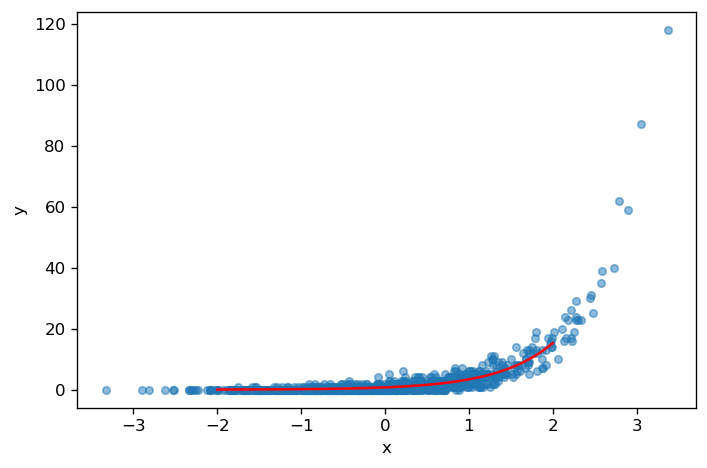

In [6]:
def makePoissonRegressionPlot():
    df = pd.read_csv("poisson_regression_data.csv")

    fig, ax = plt.subplots(dpi=120)
    df.plot.scatter("x", "y", ax=ax, alpha=0.5)

    x = df.x.values.reshape(-1, 1)
    X = np.c_[np.ones(x.shape[0]), x]
    y = df.y.values
    
    print(poissonRegressionNegLogLikelihood(np.array([2,3]), X,y))

    b0, b1 = fitPoissonRegression(X, y)

    xx = np.linspace(-2, 2, 1001).reshape(-1, 1)
    yy = np.exp(b0 + b1 * xx)

    ax.plot(xx, yy, color="red")

    plt.tight_layout()
    plt.savefig("poisson_regression.png")
    
    return None

makePoissonRegressionPlot()

### Part 7

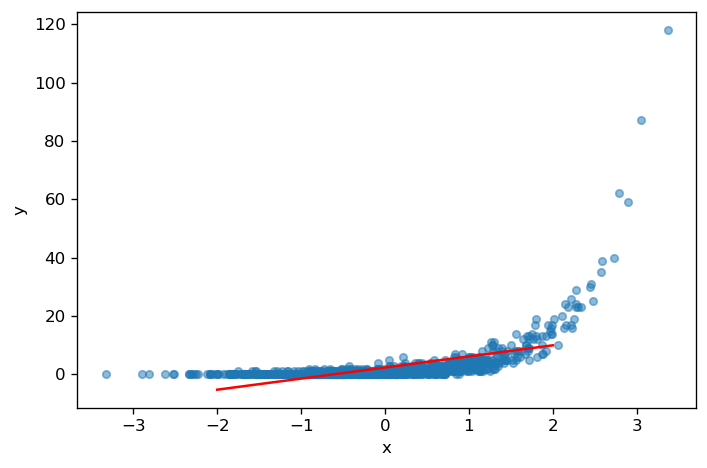

In [7]:

def makeLinearRegressionPlot():
    df = pd.read_csv("poisson_regression_data.csv")

    fig, ax = plt.subplots(dpi=120)
    df.plot.scatter("x", "y", ax=ax, alpha=0.5)

    x = df.x.values
    y = df.y.values

    slope, intercept, *_ = linregress(x, y)

    xx = np.linspace(-2, 2, 1001)
    yy = slope * xx + intercept

    ax.plot(xx, yy, color="red")

    plt.tight_layout()
    plt.savefig("linear_regression.png")

    return None

makeLinearRegressionPlot()


### Part 8


1) The coefficients from OLS are different from those from Poisson regression because OLS and Poisson regression have different likelihoods

2) The predicted mean counts are different because OLS makes different assumptions about the conditional mean.  OLS allows for negative counts, which may not be physically possible in some scenarios. In this case, since the data are close to 0, OLS results in negative counts.

